# Happiness and Societal Factors

## Permissions

Place an `X` in the appropriate bracket below to specify if you would like your group's project to be made available to the public. (Note that student names will be included (but PIDs will be scraped from any groups who include their PIDs).

* [X] YES - make available
* [  ] NO - keep private

# Overview

Our project's goal was to look into the relationships between various societal factors of different countries like GDP, healthcare coverage, and generosity of citizens and their happiness scores and see if there were statistically significant correlations. We predicted that there would be and more so for GDP and healthcare as they more greatly impact people's livelihoods. Our hypothesis was essentially confirmed, we found statistically significant relationships with all three variables but they were much stronger with GDP and coverage versus generosity.

# Names

- Matilda Michel
- Athena Le
- Thais Chen
- Athina Obfenda

<a id='research_question'></a>
# Research Question

Is there a significant correlation between a countries’ various societal factors, specifically GDP, healthcare status, and generosity of citizens, and happiness scores?

<a id='background'></a>

## Background & Prior Work

About half the world’s population do not receive health services they need, which leads to over 100 million people being trapped into poverty due to out-of-pocket expenses to cover their medical charges (WHO). The main goal of universal health care coverage is to improve people’s quality of life, yet it isn’t as easy . The outcome of health care depends on the availability and accessibility of people-centered integrated care. The UHC (universal health coverage) is managed by how they are funded and managed, this varies throughout different counties due to their GDP. 

Throughout the world, countries that reported to be more satisfied and happy with their life often come from richer and healthier counties (OWID). This is in connection to countries where their GDP per capita is higher than the world average. Countries such as Indonesia, the United States, Australia, and the United Kingdom have a stronger correlation between their income and life satisfaction. There is an upwards slope in data where wealthier countries are happier than poorer countries, as well with richer people tending to be happier than poorer people within the same countries. 

One study additionally linked healthcare costs to unhappiness (HRI). In a report by the Happiness Research Institute, they detail their findings of how individuals in Denmark with lower life satisfaction/unhappiness are 23% more likely to end up being admitted to a hospital, 58% more likely to experience a health problem that limits their ability to do work, and 72% more likely to need some form of public assistance two years after their health problem arises. 

Overall, there seems to be already clear links between these societal factors and people's happiness. In addition, there could be clear cyclical benefits to improving people's happiness. As both GDP and health care access directly effect and improve day to day quality of life and people's futures, it seems these factors would be most important compared to factors that speak to people's attitudes, like generosity. This is why we want to look further into these relationships.

- https://www.who.int/health-topics/universal-health-coverage#tab=tab_1 (WHO)
- https://ourworldindata.org/happiness-and-life-satisfaction (OWID)
- https://6e3636b7-ad2f-4292-b910-faa23b9c20aa.filesusr.com/ugd/928487_86c12c375d3a468c89efedd3cbf56bb8.pdf (HRI)

# Hypothesis


We hypothesize that there is a significant relationship between happiness score and countries’ GDP and the rating of their universal health care. We hypothesize that there won’t be a significant relationship between happiness and generosity.


Since a higher GDP per capita is also typically associated with higher average incomes and overall economic stability of the country, we predict that countries in which the GDP per capita is higher than the global average their happiness scores tend to be higher. And that a similar relationship exists between health coverage and happiness as having more health security should have a strong impact on their day to day life and happiness. Generosity of people, however, we don’t predict will be significant because having overall financial and medical care security seems more effective for improving lives than the less reliable generosity of the citizens. 

# Dataset(s)

Dataset Name: World Happiness Report 2015 (happiness2015.csv)

Link to the dataset: https://www.kaggle.com/mathurinache/world-happiness-report?select=2015.csv

Number of observations: 158


Dataset Name: World Happiness Report 2017 (happiness2017.csv)

Link to the dataset: https://www.kaggle.com/mathurinache/world-happiness-report?select=2017.csv

Number of observations: 155


These are datasets containing the happiness scores of different countries, including ratings of various societal factors for each, for 2015 and 2017.

Dataset Name: World Health Statistics 2020 - Universal Health Care Coverage (uhcCoverage.csv)

Link to the dataset: https://www.kaggle.com/utkarshxy/who-worldhealth-statistics-2020-complete?select=uhcCoverage.csv

Number of observations: 183


This dataset contains different countries' universal healthcare coverage (UHC) indexes for 2015 and 2017. The index is the World Health Organizations own measurement of quality of the country's UHC.

We plan to combine the datasets into two separate datasets for 2015 and 2017, only including countries that have values in both.

# Setup

In [3]:
import numpy as np
import pandas as pd
import math

# for plotting
import matplotlib.pyplot as plt
import seaborn as sns

# regression
import patsy
import statsmodels.api as sm

In [4]:
happiness2015 = pd.read_csv('happiness2015.csv')
happiness2017 = pd.read_csv('happiness2017.csv')
coverage = pd.read_csv('uhcCoverage.csv')

# Data Cleaning

First we cleaned up the single coverage dataset by renaming the 'Location' column into the same name as the happiness report datasets and renaming the 'First Tooltip' column, which holds the universal healthcare coverage index, into a clearer name. We also removed the unnecessary 'Indicator' column.

In [5]:
coverage = coverage.rename(columns={'Location':'Country', 'First Tooltip': 'Coverage Index'}).drop(columns=['Indicator'])

Then we seperated the coverage dataset into two, one for 2015 and one for 2017. This allowed us to easier combine the coverage index data with the happiness report datasets. 

In [6]:
coverage['Period'].dtype

dtype('int64')

In [7]:
coverage2015 = coverage[coverage['Period'] == 2015].drop(columns=['Period'])
coverage2017 = coverage[coverage['Period'] == 2017].drop(columns=['Period'])

Then we joined the two datasets for each year by Country, so that they only include countries that values from the happiness report and the coverage dataset.

In [8]:
df2015 = happiness2015.set_index('Country').join(coverage2015.set_index('Country'), how='inner').reset_index()
df2017 = happiness2017.set_index('Country').join(coverage2017.set_index('Country'), how='inner').reset_index()

In [9]:
print('df2015: ', df2015.shape, 'df2017: ', df2017.shape)

df2015:  (134, 13) df2017:  (134, 13)


In [10]:
df2015.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Coverage Index
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,82
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,85
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,82
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,86
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,88


In [11]:
df2017.head()

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual,Coverage Index
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027,87
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707,81
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715,84
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716,83
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182,78


We printed out lists of the column names of each dataset to determine which columns we didn't need and to make sure the column names were  the same.

In [12]:
factors2015 = list(df2015.columns.values)
factors2017 = list(df2017.columns.values)
print(factors2015)
print(factors2017)

['Country', 'Region', 'Happiness Rank', 'Happiness Score', 'Standard Error', 'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)', 'Generosity', 'Dystopia Residual', 'Coverage Index']
['Country', 'Happiness.Rank', 'Happiness.Score', 'Whisker.high', 'Whisker.low', 'Economy..GDP.per.Capita.', 'Family', 'Health..Life.Expectancy.', 'Freedom', 'Generosity', 'Trust..Government.Corruption.', 'Dystopia.Residual', 'Coverage Index']


We dropped columns that weren't present in both datasets. We also dropped dystopia residual column as we didn't feel it would be useful for our research question and dropped the happiness rank column as the happiness score is more useful for our analysis.

In [13]:
df2015 = df2015.drop(columns=['Region', 'Happiness Rank', 'Standard Error', 'Dystopia Residual'])
df2017 = df2017.drop(columns=['Happiness.Rank', 'Whisker.high', 'Whisker.low', 'Dystopia.Residual'])

Then we swapped the column order of the 2015 dataset to match 2017 and then changed the names of the 2017 dataset to match the 2015 one, as we felt it's names were more readable. We also updated the names of some of the columns for both years into single words to be easier to use for analysis.

In [14]:
df2015 = pd.DataFrame(df2015, columns=['Country', 'Happiness Score', 'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom', 'Generosity', 'Trust (Government Corruption)','Coverage Index'])
df2015.head()

,Country,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Generosity,Trust (Government Corruption),Coverage Index
0,Switzerland,7.587,1.39651,1.34951,0.94143,0.66557,0.29678,0.41978,82
1,Iceland,7.561,1.30232,1.40223,0.94784,0.62877,0.43630,0.14145,85
2,Denmark,7.527,1.32548,1.36058,0.87464,0.64938,0.34139,0.48357,82
3,Norway,7.522,1.45900,1.33095,0.88521,0.66973,0.34699,0.36503,86
4,Canada,7.427,1.32629,1.32261,0.90563,0.63297,0.45811,0.32957,88


In [15]:
df2017 = df2017.rename(columns={'Happiness.Score': 'Happiness', 'Economy..GDP.per.Capita.': 'GDP', 'Health..Life.Expectancy.': 'Health', 'Trust..Government.Corruption.': 'Trust', 'Coverage Index': 'Coverage'})

In [16]:
df2015 = df2015.rename(columns={'Happiness Score': 'Happiness', 'Economy (GDP per Capita)': 'GDP', 'Health (Life Expectancy)': 'Health', 'Trust (Government Corruption)': 'Trust', 'Coverage Index': 'Coverage'})

Even though both publishers of the datsets stated there were no missing values, we double checked it, but there were no missing values.

In [17]:
print(df2015.isnull().values.any())
print(df2017.isnull().values.any())

False
False


Lastly, we reordered both datasets in alphabetical order by country name.

In [18]:
df2015 = df2015.sort_values(by=['Country']).reset_index(drop=True)
df2017 = df2017.sort_values(by=['Country']).reset_index(drop=True)

In [25]:
df2017.head()

,Country,Happiness,GDP,Family,Health,Freedom,Generosity,Trust,Coverage
0,Afghanistan,3.794,0.401477,0.581543,0.180747,0.106180,0.311871,0.061158,37
1,Albania,4.644,0.996193,0.803685,0.731160,0.381499,0.201313,0.039864,59
2,Algeria,5.872,1.091864,1.146217,0.617585,0.233336,0.069437,0.146096,78
3,Angola,3.795,0.858428,1.104412,0.049869,0.000000,0.097926,0.069720,40
4,Argentina,6.599,1.185295,1.440451,0.695137,0.494519,0.109457,0.059740,76


# Data Analysis & Results (EDA)

# Distributions of Relevant Variables 

In order for us to check if there is a correlation between countries’ various societal factors, specifically GDP, healthcare status, and happiness scores, we decided to check the distributions of the relevant variables before using linear regression to determine if finding the linear regression is the most accurate in representing the correlation. Within these distributions we looked at the individual factors from the years 2015 and 2017 side by side to see if there is a visual similarity. 

**Distribution of GPD for the Years 2015 and 2017**

Text(0.5, 0, '2017')

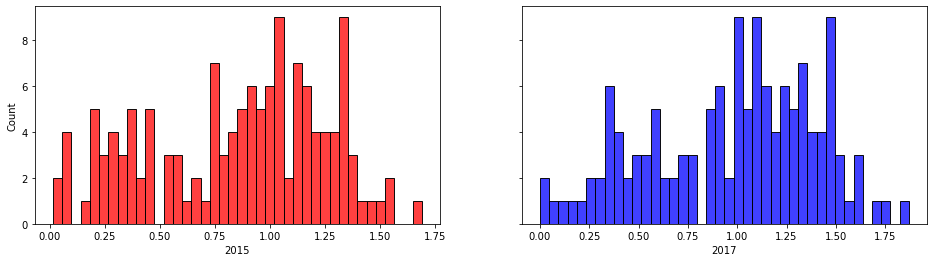

In [20]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True)
fig.set_size_inches(16,4)
sns.histplot(df2015['GDP'], ax=ax1, bins=40, color='r')
ax1.set_xlabel('2015')
sns.histplot(df2017['GDP'], ax=ax2, bins=40, color='b')
ax2.set_xlabel('2017')

In these two graphs, we noticed there is a bimodal distribuition in both 2015 and 2017, but is visually more prominent in 2015.

We were curious to see which countries were on the first half of the distribution, so we decided to look at countries from both 2015 and 2017 that were included within the lower half of the GDP distibution. To do so, we looked at the 2015 and 2017 distributions and filtered out the countries that were under 0.7. We then overlapped the two subsets to see which countries remained on the lower half of the GDP distribution over the past two years.

In [21]:
df2015_lower_gdp = df2015[df2015['GDP'] < 0.70]
df2015_lower_gdp.shape

(43, 9)

In [22]:
df2017_lower_gdp = df2017[df2017['GDP'] < 0.70] 
df2017_lower_gdp.shape

(37, 9)

In [23]:
gdp15 = df2015_lower_gdp['Country']
gdp17 = df2017_lower_gdp['Country']
gdp15 = set(gdp15)
gdp17 = set(gdp17)
overlap = gdp15.intersection(gdp17)
overlap

{'Afghanistan',
 'Bangladesh',
 'Benin',
 'Burkina Faso',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Central African Republic',
 'Chad',
 'Ethiopia',
 'Ghana',
 'Guinea',
 'Haiti',
 'Kenya',
 'Kyrgyzstan',
 'Lesotho',
 'Liberia',
 'Madagascar',
 'Malawi',
 'Mali',
 'Mauritania',
 'Mozambique',
 'Myanmar',
 'Nepal',
 'Niger',
 'Rwanda',
 'Senegal',
 'Sierra Leone',
 'Sudan',
 'Tajikistan',
 'Togo',
 'Uganda',
 'Yemen',
 'Zambia',
 'Zimbabwe'}

In [24]:
len(overlap)

35

- After checking, a majority of the countries from both years remained on the lower half of the distribution. In 2015, there were 43 countries under 0.7, and in 2017, there were  37 countries under 0.7. When overlapping the two subsets, there were 35 countries that didn't show change in their GDP. 


- We've noticed that the countries that remained on the lower half, were classified as third world countries. Given the common knowledge of current world affairs/geography, the data is representative of countries that are known to have lower GDPs. 

**Coverage Distributions for Each Year**

Text(0.5, 0, '2017')

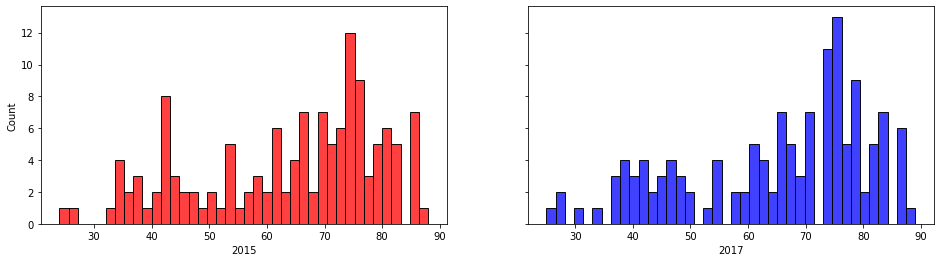

In [25]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True)
fig.set_size_inches(16,4)
sns.histplot(df2015['Coverage'], ax=ax1, bins=40, color='r')
ax1.set_xlabel('2015')
sns.histplot(df2017['Coverage'], ax=ax2, bins=40, color='b')
ax2.set_xlabel('2017')

- In both graphs, it is visually present that health care coverage is actually left skewed. This makes us want plot a linear regression of coverage in relationship with happiness to determine if there are a significant amount of outliers or if the results are homoscedastic. 


- Similar to the GDP distribution, both graphs slightly have a bimodal distribution, specifically the small grouping within the 35-50 area. This makes us want to check is there is a similarity in the subset of countries in both 2015 and 2017. We do take in account that this is a different dataset and we need to take into consideration the method of data collection and the rating scale of health care coverage within each country. 

In [26]:
df2015_lower_cov = df2015[df2015['Coverage'] < 50]
df2015_lower_cov.shape

(31, 9)

In [27]:
df2017_lower_cov = df2017[df2017['Coverage'] < 50] 
df2017_lower_cov.shape

(33, 9)

In [28]:
cov15 = df2015_lower_cov['Country']
cov17 = df2017_lower_cov['Country']
cov15 = set(cov15)
cov17 = set(cov17)
cov_overlap = cov15.intersection(cov17)
overlap = overlap.intersection(cov_overlap)
len(overlap)

26

As predicted, there is a majority of countries overlapping from 2015 and 2017, similar to the GDP distribution. It still makes us curious as it doesn't tell us much about the relationships, yet it could be useful as it indicates a correlation. We will take this further by exploring the relationship between GDP and health care coverage by plotting them as a linear regression. 

**Happiness Distributions for Each Year**

Text(0.5, 0, '2017')

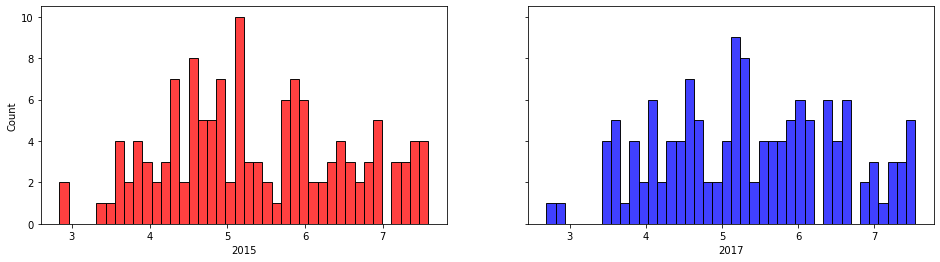

In [29]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True)
fig.set_size_inches(16,4)
sns.histplot(df2015['Happiness'], ax=ax1, bins=40, color='r')
ax1.set_xlabel('2015')
sns.histplot(df2017['Happiness'], ax=ax2, bins=40, color='b')
ax2.set_xlabel('2017')

- The distribution of happiness throughout all countries seem to fit within a normal distribution. Due to this outcome, it makes us want to further explore the relationship between GDP, health care coverage with happiness by plotting it as a linear regression to see if the linear regression will show strong correlation. 


- Throughout all three distributions, we decided on 40 bins to determine the outcome as it seemed the most accurate and appropriate in representing the distribution.

# Relationships + Linear Regression

- After checking the distributions, we wanted to double check the data by plotting the relationships between factors and happiness to see if plotting linear regressions will give us an accurate representation of the correlation and determine whether or not we will obtain an accurate result of the analysis. 


- As we plot the linear regressions of the relationship of GDP, health care coverage, and happiness, we will analyze if there is a significant relationship between the factors as well as explore the different effect sizes on the plots. Given the nature of the data, and so far the distributions of the variables, linear regression would be the most effective analyis in answering our research question.

**GDP vs. Happiness of 2015 and 2017**

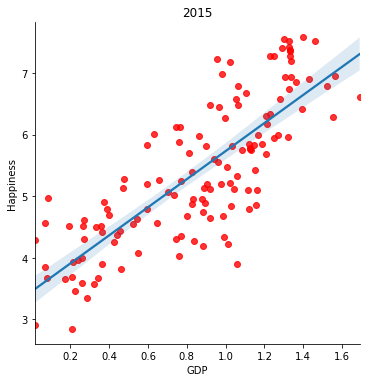

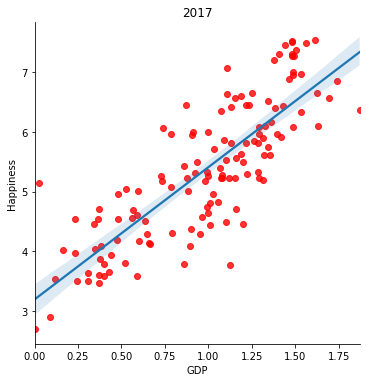

In [32]:
sns.lmplot(
    x='GDP',
    y='Happiness',
    data=df2015,
    fit_reg=True,
    scatter_kws={'color':'red'}
).set(title='2015')
sns.lmplot(
    x='GDP',
    y='Happiness',
    data=df2017,
    fit_reg=True,
    scatter_kws={'color':'red'}
).set(title='2017')

- As we plotted the linear regression of GDP vs. Happiness, there seems to be some differences in the grouping of data at either ends for both 2015 (top) and 2017 (bottom) since a majority of the data is clustered in the center of the linear regression. 


- Plotting this linear regression is indicative of a strong linear relationship that is homoscedastic and not an autocorrelation. As we predicted before, it seems that linear regression is a good fit to represent the correlation we are looking for. 

Now that we have confirmed that linear regression is an appropriate fit for the data, we can fit a regression line for GDP's relationship with happiness to help determine if there is a statistically significant correlation.

**Linear regression Happiness vs. GDP of 2015 and 2017**

In [33]:
outcome_1, predictors_1 = patsy.dmatrices('Happiness ~ GDP', df2015)
mod_1 = sm.OLS(outcome_1, predictors_1)
res_1 = mod_1.fit()
coeff = res_1.params
pvalues = res_1.pvalues
print('coeff: ', coeff[1], 'pvalue: ', pvalues[1])

coeff:  2.281392938845653 pvalue:  6.400035504100554e-31


In [34]:
outcome_2, predictors_2 = patsy.dmatrices('Happiness ~ GDP', df2017)
mod_2 = sm.OLS(outcome_2, predictors_2)
res_2 = mod_2.fit()
coeff = res_2.params
pvalues = res_2.pvalues
print('coeff: ', coeff[1], 'pvalue: ', pvalues[1])

coeff:  2.218167109766717 pvalue:  5.273613431938088e-34


For both years, there appears to be a significant positive correlation between GDP and happiness score, shown in the p-value results for both years (p < 0.01). There does seem to be a fairly strong effect, as shown by the slope in the previously plotted graphs and here.

Next we can look further into coverage's relationship with happiness. First we plotted the relationship with a regression line to observe the grouping of the data points and determine if linear regression is indeed appropriate for these variables.

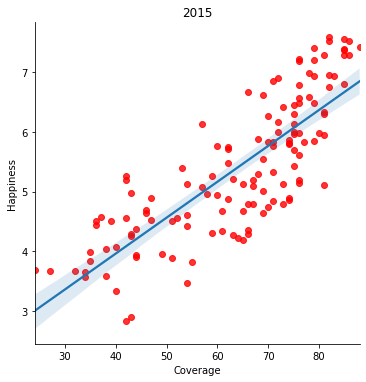

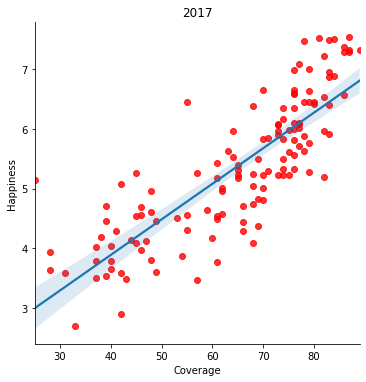

In [37]:
sns.lmplot(
    x='Coverage',
    y='Happiness',
    data=df2015,
    fit_reg=True,
    scatter_kws={'color':'red'}
).set(title='2015')
sns.lmplot(
    x='Coverage',
    y='Happiness',
    data=df2017,
    fit_reg=True,
    scatter_kws={'color':'red'}
).set(title='2017')

- Again, seems like a bit of a variation in the grouping of data, there being more dense clustering at right end versus the left, but there is a pretty clear linear relationship and difference doesn't seem enough to discount it as homoscedastic. So we can continue with using linear regression to see if the relationship is significant.

**Linear Regression Coverage vs. Happiness of 2015 and 2017**

In [ ]:
outcome_3, predictors_3 = patsy.dmatrices('Happiness ~ Coverage', df2015)
mod_3 = sm.OLS(outcome_3, predictors_3)
res_3 = mod_3.fit()
coeff = res_3.params
pvalues = res_3.pvalues
print('coeff: ', coeff[1], 'pvalue: ', pvalues[1])

In [ ]:
outcome_3_17, predictors_3_17 = patsy.dmatrices('Happiness ~ Coverage', df2017)
mod_3_17 = sm.OLS(outcome_3_17, predictors_3_17)
res_3_17 = mod_3_17.fit()
coeff = res_3_17.params
pvalues = res_3_17.pvalues
print('coeff: ', coeff[1], 'pvalue: ', pvalues[1])

As shown by both years, there does also appear to be a strong positive correlation between Coverage and happiness score and it is statistically significant (p < 0.01). 

Given our background knowledge of GDP and universal health care coverage, they could be confounding variables when it comes to happiness if possibly one of them is actually the underlying correlation driving the appearance of a correlation between the other and happiness. So lets look at a multivariate linear regression with those two for each year.

In [ ]:
outcome_4, predictors_4 = patsy.dmatrices('Happiness ~ GDP + Coverage', df2015)
mod_4 = sm.OLS(outcome_4, predictors_4)
res_4 = mod_4.fit()
coeff = res_4.params
pvalues = res_4.pvalues
print('GDP - coeff: ', coeff[1], 'pvalue: ', pvalues[1])
print('Coverage - coeff: ', coeff[2], 'pvalue: ', pvalues[2])

In [ ]:
outcome_4_17, predictors_4_17 = patsy.dmatrices('Happiness ~ GDP + Coverage', df2017)
mod_4_17 = sm.OLS(outcome_4_17, predictors_4_17)
res_4_17 = mod_4_17.fit()
coeff = res_4_17.params
pvalues = res_4_17.pvalues
print('GDP - coeff: ', coeff[1], 'pvalue: ', pvalues[1])
print('Coverage - coeff: ', coeff[2], 'pvalue: ', pvalues[2])

Taking both GDP and Coverage into account, they both still appear to significantly correlate with happiness score. All p-values are < 0.01.

For the last section of our analysis, we want to compare our findings so far with the possible relationship between generosity and happiness. In this dataset, the generosity scores represent the rates of people in those countries that have given to charity recently. We want to explore the relationship between the attitudes and existence of charitable giving and happiness versus a country's overall economic health (as shown by GDP and rate of universal health care, which is impacted by a countries ability to pay for it).

**Distribution of Generosity for both years**

Text(0.5, 0, '2017')

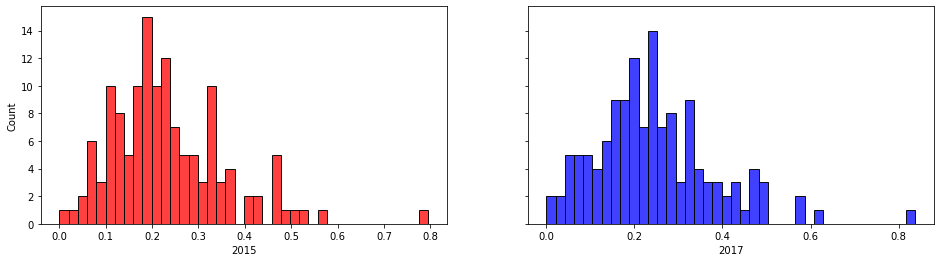

In [29]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True)
fig.set_size_inches(16,4)

sns.histplot(df2015['Generosity'], ax=ax1, bins=40, color='r')
ax1.set_xlabel('2015')
sns.histplot(df2017['Generosity'], ax=ax2, bins=40, color='b')
ax2.set_xlabel('2017')

It seems to have a fairly normal distribtution but seems heavily skewed to the right from very a very small amount of outliers, similar for each year. Let's take a closer look at how many are in that bin above 0.8.

In [30]:
high_gen_15 = df2015[df2015['Generosity'] > 0.7]
high_gen_17 = df2017[df2017['Generosity'] > 0.7]
print(high_gen_15)
print(high_gen_17)

    Country  Happiness      GDP   Family   Health  Freedom  Generosity  \
86  Myanmar      4.307  0.27108  0.70905  0.48246  0.44017     0.79588   

      Trust  Coverage  
86  0.19034        59  
    Country  Happiness       GDP    Family    Health   Freedom  Generosity  \
85  Myanmar      4.545  0.367111  1.123236  0.397523  0.514492    0.838075   

       Trust  Coverage  
85  0.188816        61  


It appears to be the same single country, Myanmar, for both years. In doing some further background research, it appears the culture abnormally heavily encourages charitable giving. Since it's only 1 country and is large distance from all the other points, we'll simply remove it for our analyses including generosity.

In [31]:
df2015 = df2015.drop([86])
df2017 = df2017.drop([85])

Text(0.5, 0, '2017')

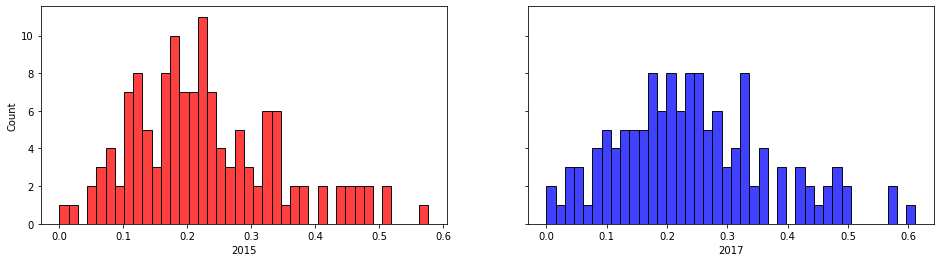

In [32]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True)
fig.set_size_inches(16,4)

sns.histplot(df2015['Generosity'], ax=ax1, bins=40, color='r')
ax1.set_xlabel('2015')
sns.histplot(df2017['Generosity'], ax=ax2, bins=40, color='b')
ax2.set_xlabel('2017')

- Looking at the distribution now, both years appear to be a more normal distribution, without as much of a skew. This seems more appropriate for performing linear regression on as that single outlier will not be included and possibly have to much "weight" in the analysis and disproportionately effect the results.


- First we'll plot the relationship and regression of generosity and happiness to see if linear regression will be an appropriate fit for analyzing the relationship.

**Generosity vs. Happiness 2015 and 2017**

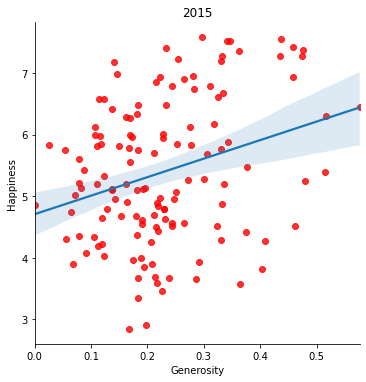

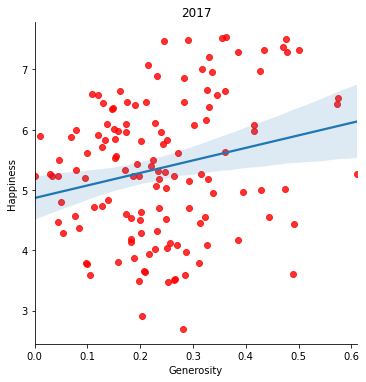

In [37]:
sns.lmplot(
    x='Generosity',
    y='Happiness',
    data=df2015,
    fit_reg=True,
    scatter_kws={'color':'red'}
).set(title='2015')
sns.lmplot(
    x='Generosity',
    y='Happiness',
    data=df2017,
    fit_reg=True,
    scatter_kws={'color':'red'}
).set(title='2017')

This data is much less of a clear linear relationship and might not be quite homoscedastic. Most of the data points are not close to the fitted regression line at all, however, you can see a slightly positive trend. We will however take a look at the p-value for one of them.

In [ ]:
outcome_6, predictors_6 = patsy.dmatrices('Happiness ~ Generosity', df2015)
mod_6 = sm.OLS(outcome_6, predictors_6)
res_6 = mod_6.fit()
coeff = res_6.params
pvalues = res_6.pvalues
print('coeff: ', coeff[1], 'pvalue: ', pvalues[1])

Taking a look at the p-value, it is < 0.01, indicating some kind of statistically significant relationship, but given the ill-fitting data, we can't be very certain about confirming the correlation.

Finally, we performed multivariate linear regression with all three: GDP, Coverage, and Generosity, to give us possible insight to see if any are confounding variables.

**Multivariate Linear Regression GDP + Coverage + Generosity vs. Happiness**

In [ ]:
outcome_5, predictors_5 = patsy.dmatrices('Happiness ~ GDP + Coverage + Generosity', df2015)
mod_5 = sm.OLS(outcome_5, predictors_5)
res_5 = mod_5.fit()
coeff = res_5.params
pvalues = res_5.pvalues
print('GDP - coeff: ', coeff[1], 'pvalue: ', pvalues[1])
print('Coverage - coeff: ', coeff[2], 'pvalue: ', pvalues[2])
print('Generosity - coeff: ', coeff[3], 'pvalue: ', pvalues[3])

There does not seem to be confounding variable, p-values for all are still < 0.01, showing relationships still statistically significant, despite the uncertainty with generosity.

These findings support our hypothesis that coverage and gdp would have signficant strong relationships with happiness (p < 0.01) and that generosity does not have a strong relationship. Though there was an indication that there was a statistically signficant relationship between happiness and generosity (p > 0.01), the effect was not strong and we can't necessarily be certain about those results given the data points being quite far apart.

# Ethics & Privacy

We do not believe there will be any issues regarding the privacy of any individuals. Other than their country of residence, in the happiness score dataset we used, there was no demographic or personal information recorded about the responders and the results were all averaged into single observations for each country. In addition, the data for both the healthcare and happiness score datasets were collected by respected, well known organizations (Gallup and WHO). 

We believe the results of this project could prove to be very beneficial to the debate regarding the justification and efficacy of universal health care coverage and how financial situations can affect happiness. One potential worry, however, could be overemphasizing any correlation found between these factors and over-simplifying how policies and various societal conditions affect happiness or the actual well-being of citizens.

# Conclusion & Discussion

This project aimed to find the correlation between the variables associated with a country: GDP, healthcare coverage, and generosity, through the analysis of 2 datasets of different years, 2015 and 2017. We plotted two histograms for each variable to show its distribution and to determine the relevance of using linear regression. For GDP, we came to the conclusion of a bimodal distribution, indicating that non industrialized countries have a lower GDP. Coverage was left skewed, but with the presence of a slight left lean towards a bimodal distribution. When working with the happiness distribution, we achieved a more normal distribution.


We determined that a linear regression was a good fit for all of our variables based on the plotted relationships between all of our variables. The determining factors were the presence of a linear relationship between the various variables and clear homoscedastic and not autocorrelated relationships. From our linear regression analysis, we determined with p > 0.01, there are strong correlations between GDP and healthcare coverage and happiness, and only a very weak correlation between generosity and happiness.

There were multiple limitations in our project that both limited the scope of our conclusions. One of the biggest limitations of our project was that we were only able to look at data from 2015 and 2017 as those were the most up-to-date data we could find for all of our desired data (healthcare coverage, GDP, and generosity). Another limitation is that our analysis is limited only to the countries that had data for all three societal factors we wanted to analyze, leaving us with only around 150 observations for each year. As a result our conclusions may not necessarily be an accurate representation of the correlation between happiness and the societal factors of GDP, healthcare coverage and generosity that we looked at. A third limitation would be how our project only provides evidence for correlation, not causation, so assumptions of country happiness scores due to GDP, healthcare coverage and/or generosity can’t and shouldn’t be made.

Our conclusion of a strong positive correlation between healthcare coverage and happiness scores and between GDP and happiness scores demonstrate that societies with higher GDPs and universal healthcare coverage are more likely to have a happier population. This could imply that countries that aim to improve their country’s happiness score should consider investigating the value of universal healthcare coverage and how increasing their GDP might benefit the happiness of their citizens and/or the country’s happiness scores. On the other hand, our lack of a clear conclusion on the relationship between generosity and happiness may imply that having happier citizens will not necessarily make them more generous and/or vice versa, if a country is aiming to have more generous individuals. Overall, our project may be able to provide some insight on potential areas of interest for investigation for countries that aim to increase their country’s happiness scores, what affects the happiness of a country’s citizens, and potentially provide support to the potential benefits for investing in and/or implementing universal healthcare coverage. The happiness of individuals, based on our background research from the Happiness Research Institute, additionally is linked to having higher healthcare and public assistance costs, which may make our project results of interest to countries that want to lower their expenses in these fields, showing that it might be worthwhile for countries to invest in the happiness of their citizens.

# Team Contributions

Matilda - Data Cleaning + Analysis code, Data Cleaning + Analysis explanations, parts of background information, parts of ethics + privacy, happiness datasets, presentation slides

Athena Le - Parts of Research Question, Hypothesis, Video Presentation, Data 
Cleaning + Conclusion, presentation slides

Athina Obfenda - Portion of background and prior work, video presentation, and data analysis, parts of ethics and privacy

Thais - Conclusion, video presentation, clipping together video presentation